# 의사결정트리(Decision Tree)

일반적으로 하나의 의사결정 트리는 하나의 루트 노드(root node), 여러 개의 내부 노드(internal node), 여러 개의 리프 노드(leaf node | terminal node)

잎의 경우 결정 결과에 상응.

기타 다른 노드는 하나의 속성 테스트에 상응.

각 노드에 포함된 샘플 집합은 속성 테스트 결과에 따라 하윋 노드로 분류됩니다.

루트 노드는 모든 샘플의 집합을 포함합니다. 

루트 노드에서 시작해 각 잎으로 뻗어가는 과정은 일련의 판단과 테스트 과정입니다.

의사결정 트리 학습의 목표는 일반화 성능이 뛰어난 트리를 얻는 것입니다.(To create a model that predicts the value of a target variable based on several input variabels.)

의사결정 트리 알고리즘에서 다음 3가지 상황에서 재귀 과정이 일어남

1. 해당 노드에 포함된 샘플이 모두 같은 클래스에 속할 경우, 더는 분할을 진행하지 않는다.
2. 해당 속성 집합이 0일 경우, 혹은 모든 샘플이 모든 속성에서 같은 값을 취할 경우, 더는 분할을 진행할 수 없다.(=Terminal Node)
3. 해당 노드가 포함하고 있는 샘플의 집합이 0일 경우, 더는 분할을 진행할 수 없다.(= Leaf Node)

## 01. 패키지 가져오기

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text, export_graphviz, plot_tree
import graphviz
import dtreeviz
from plotnine import *

## 02. 데이터 가져오기

In [3]:
origin = pd.read_excel("iris.xlsx")
origin.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 03. 데이터 분할

In [4]:
x = origin.drop("Species", axis =1)
y = origin['Species'].map({'setosa':0, "versicolor":1, "virginica":2})
x.shape, y.shape

((150, 4), (150,))

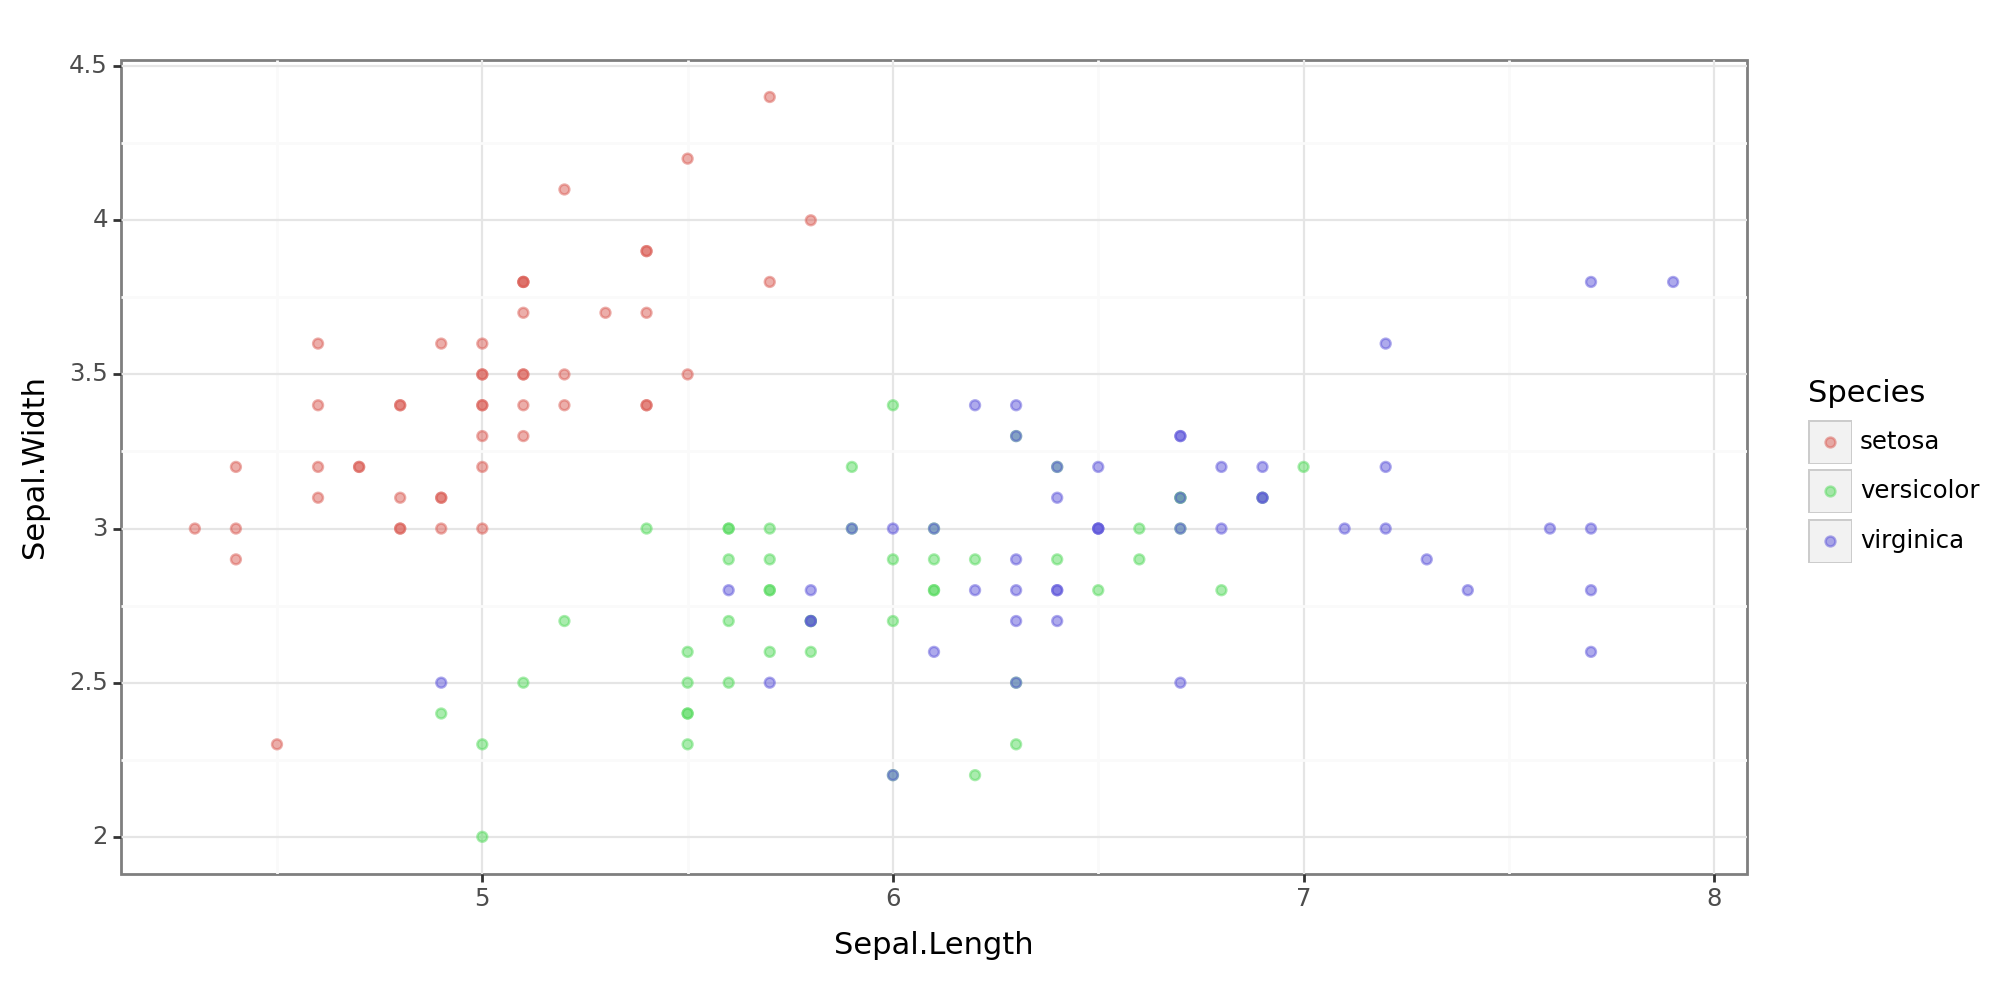

<Figure Size: (1000 x 500)>

In [5]:
ggplot(data=origin, mapping=aes(x='Sepal.Length', y='Sepal.Width', color='Species')) + geom_point(alpha=0.5) + theme_bw() + theme(figure_size=(10, 5))

## 04. 학습모델 구현

학습 모델 객체 정의

In [6]:
dtree = DecisionTreeClassifier(random_state=123, max_depth=3)
dtree.fit(x.values,y)

DecisionTreeClassifier(max_depth=3, random_state=123)

In [9]:
et =  export_text(dtree,
                  feature_names=list(x.columns),
                  class_names = ('setosa', 'versicolor', 'virginica')
)
print(et)

|--- Petal.Length <= 2.45
|   |--- class: setosa
|--- Petal.Length >  2.45
|   |--- Petal.Width <= 1.75
|   |   |--- Petal.Length <= 4.95
|   |   |   |--- class: versicolor
|   |   |--- Petal.Length >  4.95
|   |   |   |--- class: virginica
|   |--- Petal.Width >  1.75
|   |   |--- Petal.Length <= 4.85
|   |   |   |--- class: virginica
|   |   |--- Petal.Length >  4.85
|   |   |   |--- class: virginica



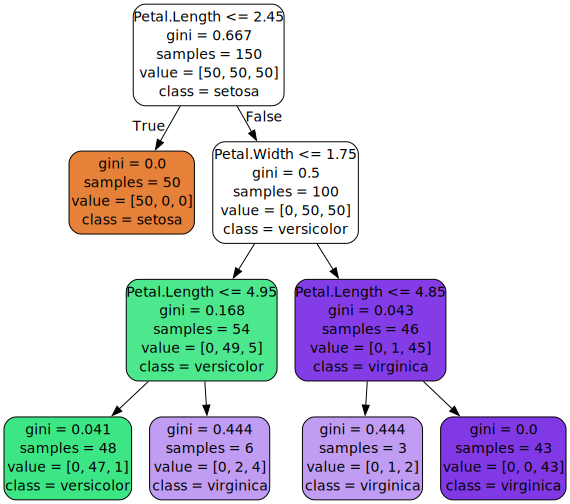

In [12]:
export_graphviz(
    dtree,
    out_file  ='iris.dot',
    feature_names=list(x.columns),
    class_names= ['setosa', 'versicolor', 'virginica'],
    rounded = True,     # 노드의 모서리를 둥글게
    filled =  True,           # 노드의 색상을 다르게 
    fontname = "Malgun Gothic"
)

with open("iris.dot") as f:
    dot = f.read()
    display(graphviz.Source(dot))

2. **plot_tree**

기본 파라미터는 export_tree 함수와 동일

하지만 pyplot을 통해서 출력해야함.

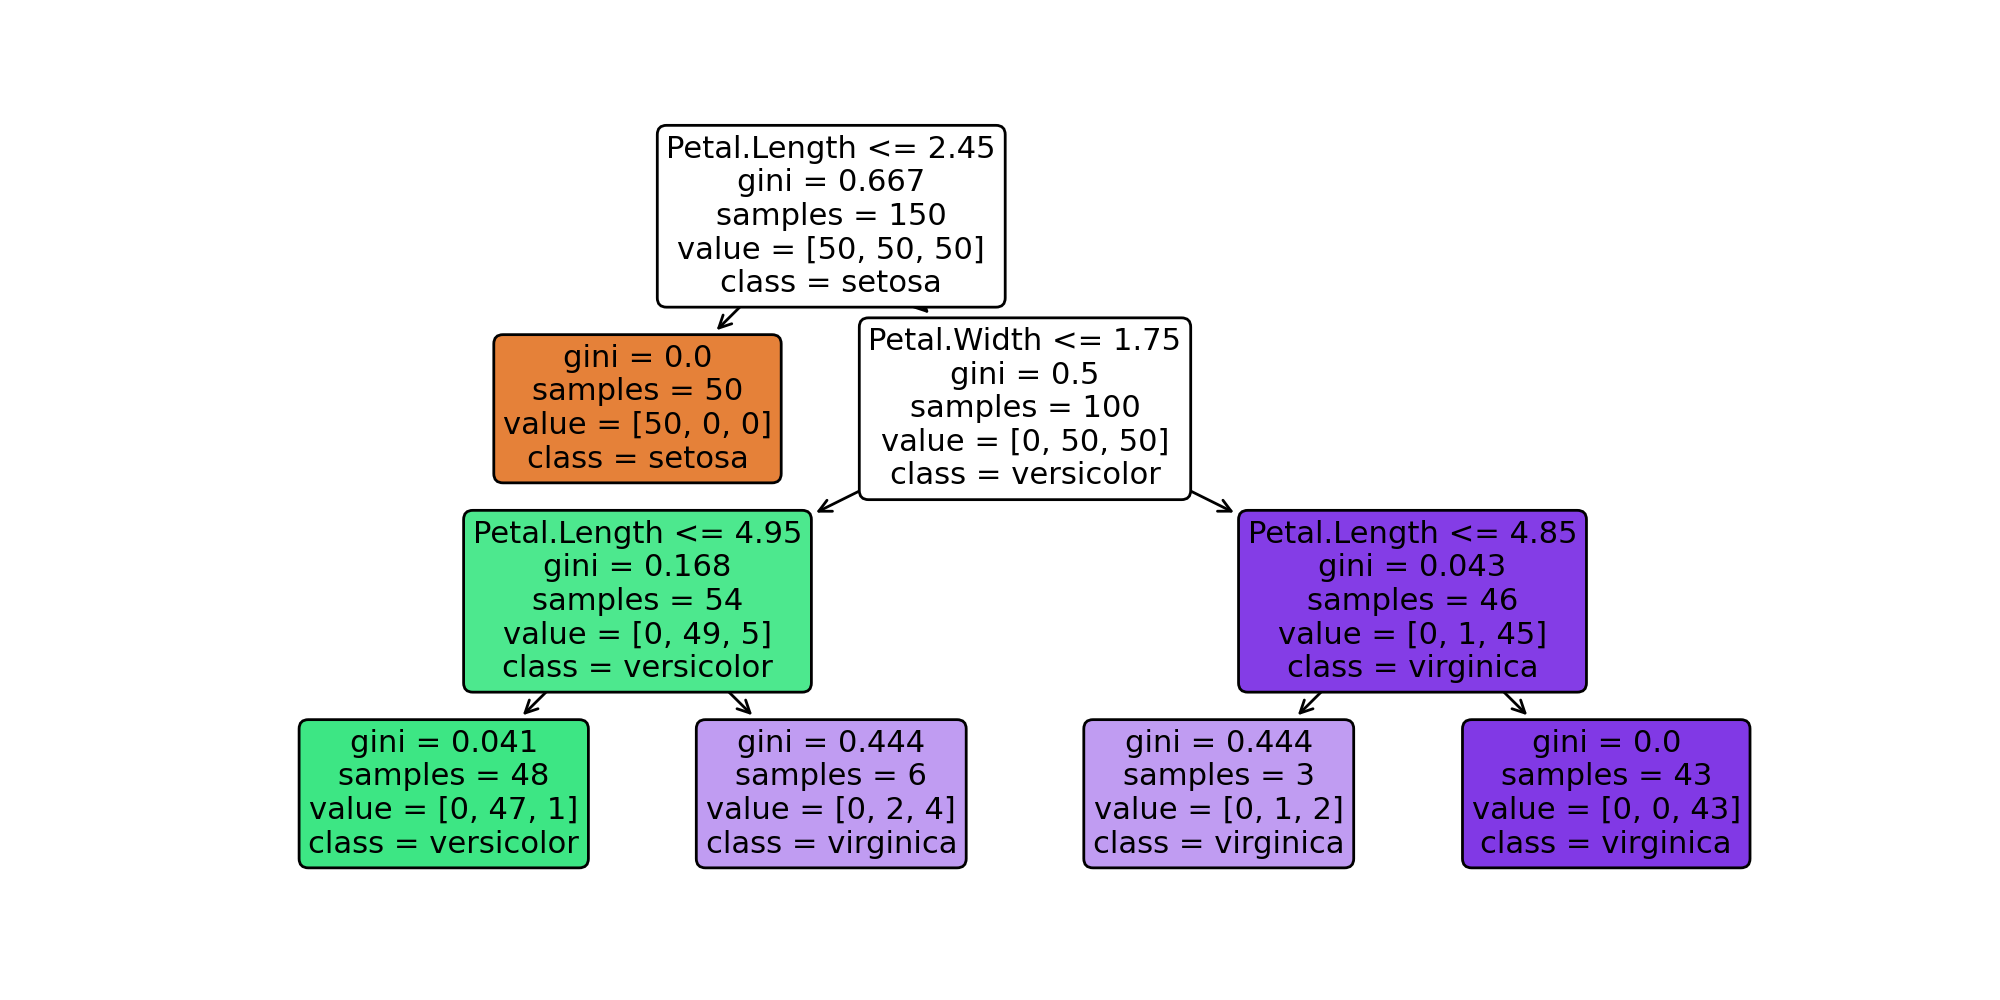

In [13]:
plt.figure(figsize= (10,5))

# 리턴을 안 받으면 그래프가 2개가 출력된다. 리턴 값을 따로 사용할 것이 아니므로 언더바로 받을 수 있음.
_ = plot_tree(dtree,
              feature_names = list(x.columns),
              class_names = ['setosa', 'versicolor', 'virginica'],
              rounded = True,
              filled= True)

plt.show()
plt.close()

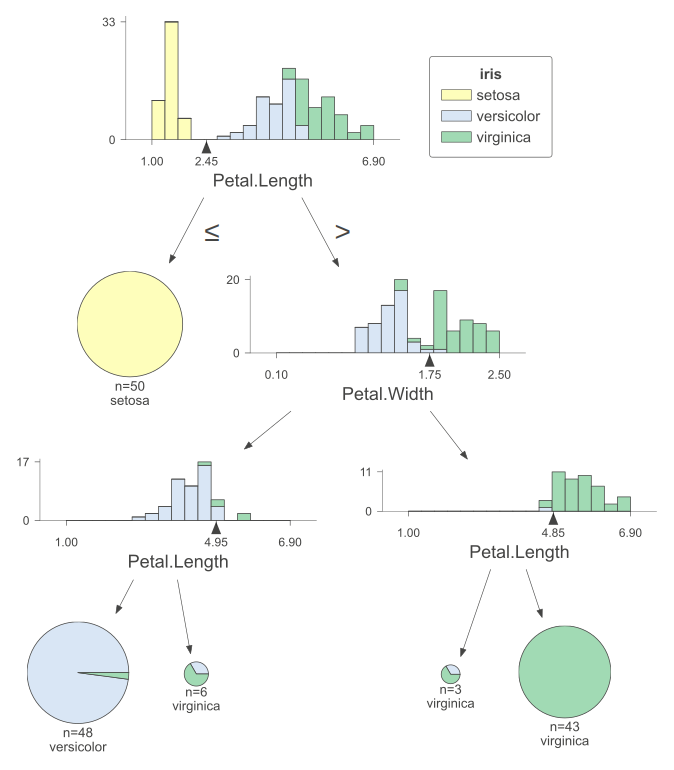

In [15]:
viz = dtreeviz.model(dtree,
                     X_train= x,
                     y_train = y,
                     target_name='iris',
                     feature_names=list(origin.columns[:-1]),
                     class_names=['setosa','versicolor','virginica'])

viz.view(scale=2.0)